In [1]:
library(KFAS)

In [2]:
sales <- read.csv("leadingDAT_src/sales.csv",fileEncoding="shift-jis")

In [5]:
machine <- sales[,3]

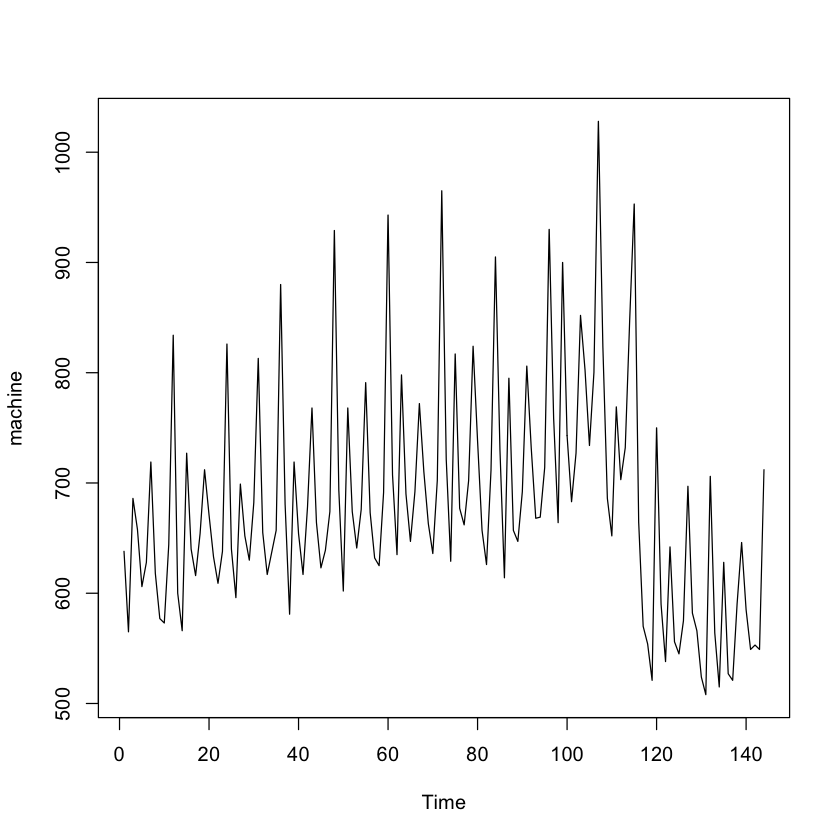

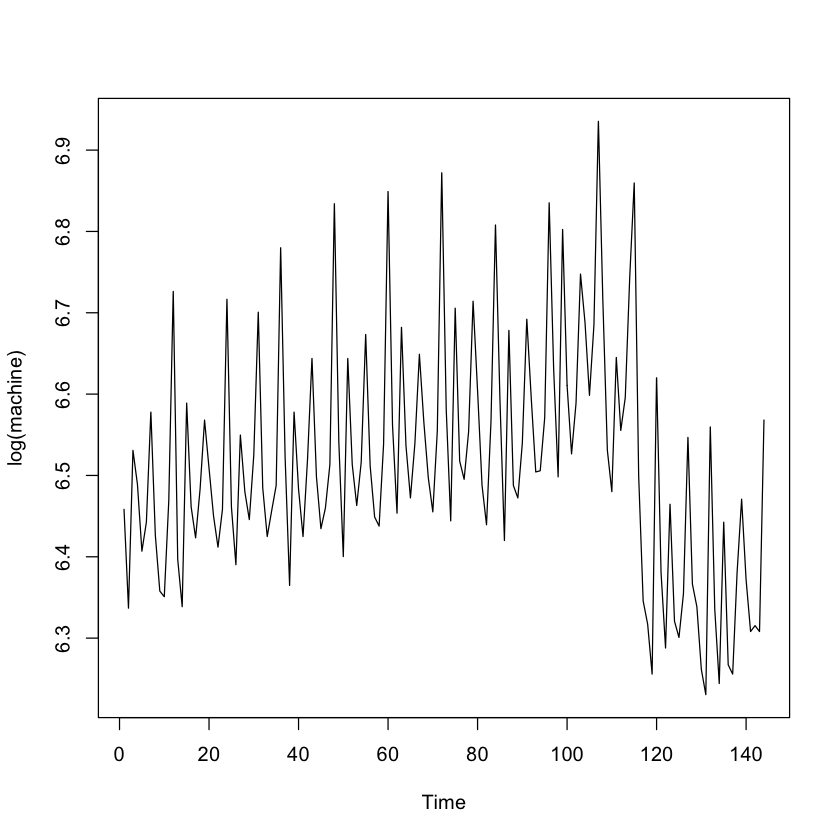

In [7]:
ts.plot(machine)
ts.plot(log(machine))

In [8]:
mod0 <- SSModel(log(machine) ~ SSMtrend(1,Q=NA)
               + SSMseasonal(12,Q=NA,sea.type="dummy"),H=NA)
fit0 <- fitSSM(mod0,numeric(3))
# Specify all components that are used to get error
kfs0 <- KFS(fit0$model,smoothing=c("state","mean","disturbance"))

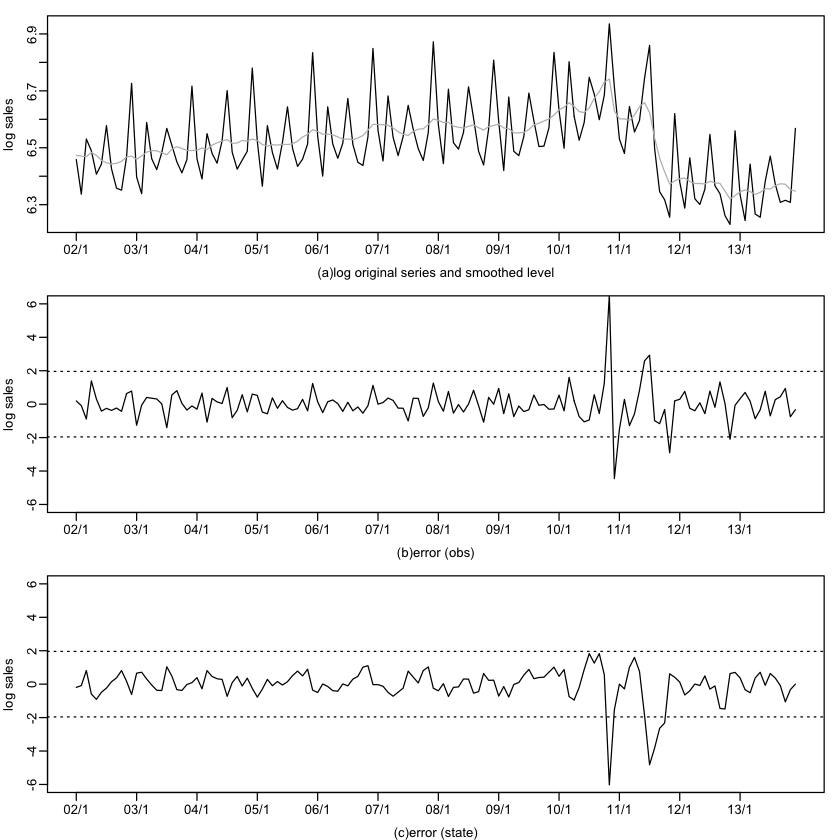

In [11]:
par(mfrow=c(3,1))
par(mar=c(3,3,1,1))
par(mgp=c(2,0.5,0))
plot(log(machine),type="l",xaxt="n",xlab="(a)log original series and smoothed level",ylab="log sales")
lines(kfs0$alphahat[,"level"],col=8)
axis(side=1,at=1+0:11*12,labels=c("02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1"))

plot(rstandard(kfs0, "pearson"),ylim=c(-6,6),xaxt="n",xlab="(b)error (obs)",ylab="log sales")
abline(h=c(-1.96,1.96),lty=3)
axis(side=1,at=1+0:11*12,labels=c("02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1"))

plot(rstandard(kfs0, "state")[,1],ylim=c(-6,6),xaxt="n",xlab="(c)error (state)",ylab="log sales")
abline(h=c(-1.96,1.96),lty=3)
axis(side=1,at=1+0:11*12,labels=c("02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1"))

以下における残差が特に目立つ
* 2010/12：エコポイントの制度変更
* 2011/7：地上アナログ放送停波

# Outlier Handling

### introduction of level change variable

In [14]:
machineNA <- machine
# set NA at outlier indices
machineNA[sales[,1] %in% c("2010年11月","2010年12月")] <- NA

In [15]:
ShiftLevel <- (1:nrow(sales) >= which(sales[,1]=="2011年8月"))

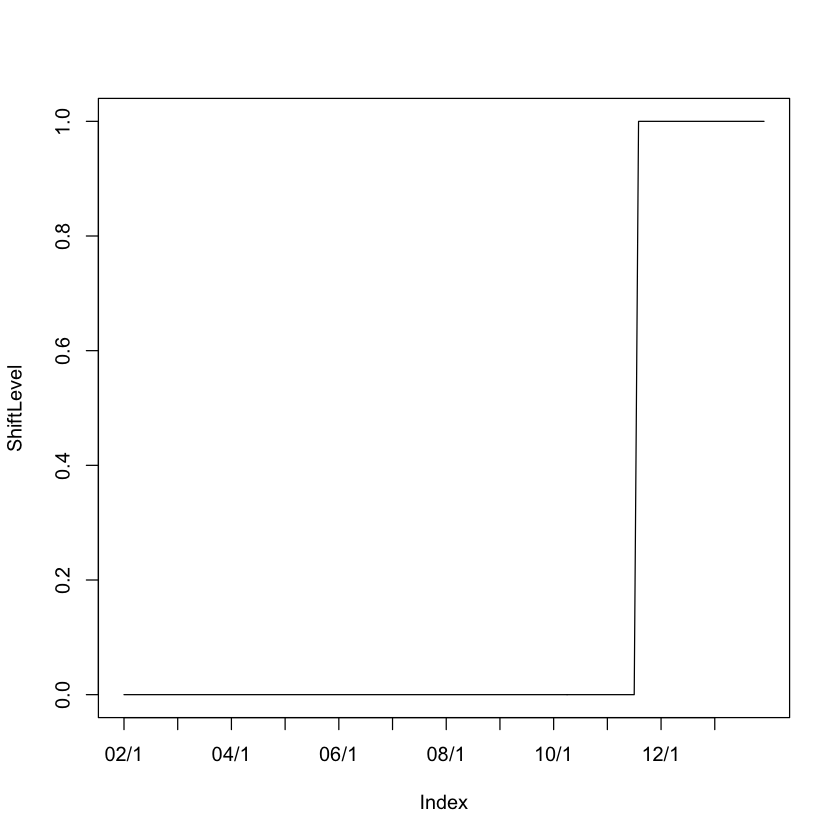

In [19]:
plot(ShiftLevel,type="l",xaxt="n")
axis(side=1,at=1+0:11*12,labels=c("02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1"))

In [20]:
# model definition
modShift <- SSModel(log(machineNA) ~ SSMtrend(1,Q=NA)
                   + SSMseasonal(12,Q=NA,sea.type="dummy")
                   + ShiftLevel,  # add dummy variable
                    H=NA)
fitShift <- fitSSM(modShift,numeric(3))
kfsShift <- KFS(fitShift$model,smoothing=c("state","mean","disturbance"))

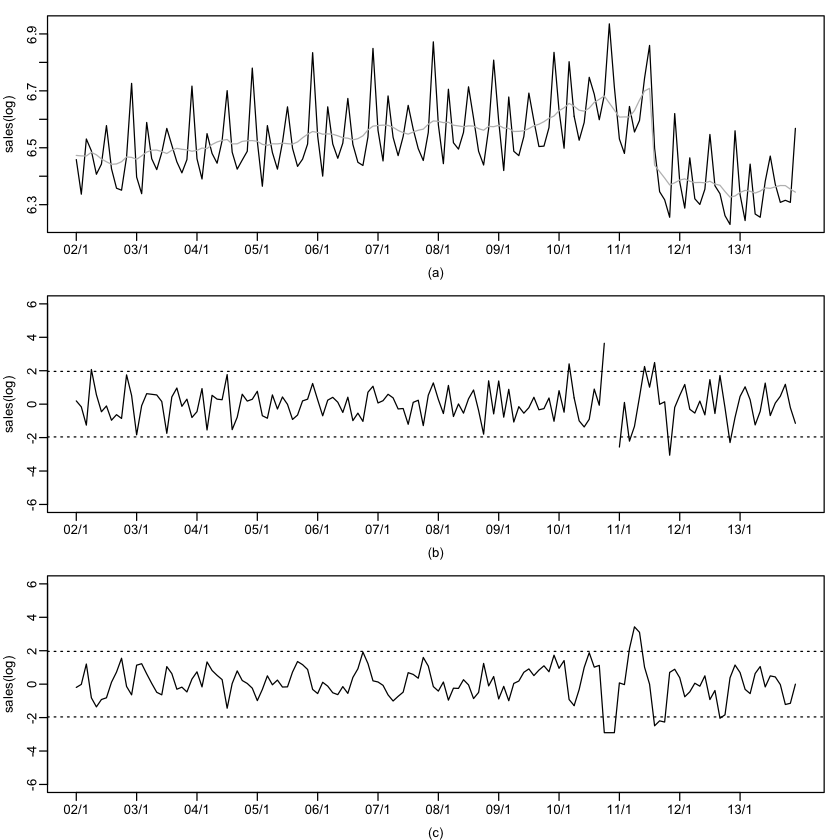

In [21]:
par(mfrow=c(3,1)) 
par(mar=c(3,3,1,1))
par(mgp=c(2,0.5,0))
plot(log(machine),type="l",xaxt="n",xlab="(a)",ylab="sales(log)")
lines(kfsShift$muhat - kfsShift$alphahat[,"sea_dummy1"],col=8)
axis(side=1,at=1+0:11*12,labels=c("02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1"))
plot(rstandard(kfsShift, "pearson"),ylim=c(-6,6),xaxt="n",xlab="(b)",ylab="sales(log)")
abline(h=c(-1.96,1.96),lty=3)
axis(side=1,at=1+0:11*12,labels=c("02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1"))
plot(rstandard(kfsShift, "state")[,1],ylim=c(-6,6),xaxt="n",xlab="(c)",ylab="sales(log)")
abline(h=c(-1.96,1.96),lty=3)
axis(side=1,at=1+0:11*12,labels=c("02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1"))
